In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os, scipy.stats
from time import time 

# Analyse Alpha Band CCDs of Schizophrenics vs. Controls

1. Plot average CCD Histogramm of both groups
2. Plot ten subject CCDs of each group
3. Plot five CCD and corresponding Histogramms with a fitted gamma function

### Plot Average CCD Histogram

KS Stats: 0.04261587880662854, P-Value: 7.767361720655738e-34


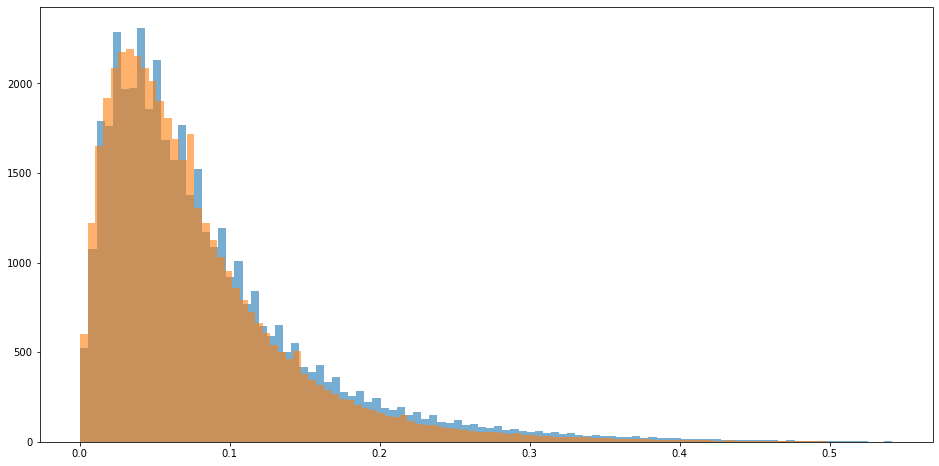

In [46]:
# Load CCD hist
control_hist = np.load('data/Group-Control_Freq-Alpha_Avg-CCD-Hist.npy')
fep_hist = np.load('data/Group-FEP_Freq-Alpha_Avg-CCD-Hist.npy')

# Plot 
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(control_hist, bins=100, alpha=0.6);
ax.hist(fep_hist, bins=100, color='tab:orange', alpha=0.6);
dist, pval = scipy.stats.ks_2samp(control_hist, fep_hist)
print(f'KS Stats: {dist}, P-Value: {pval}')

# Plot example CCD of 6 Subjects per Group

In [12]:
# Set ID List
fep_subs = ['F001', 'F002', 'F003', 'F004', 'F006', 'F007', 'F008', 'F009', 'F010', 'F011']
control_subs = ['S001', 'S002', 'S005', 'S006', 'S007', 'S013', 'S022', 'S025', 'S028', 'S032']

### Plot FEP Group - Min 0, Max 1

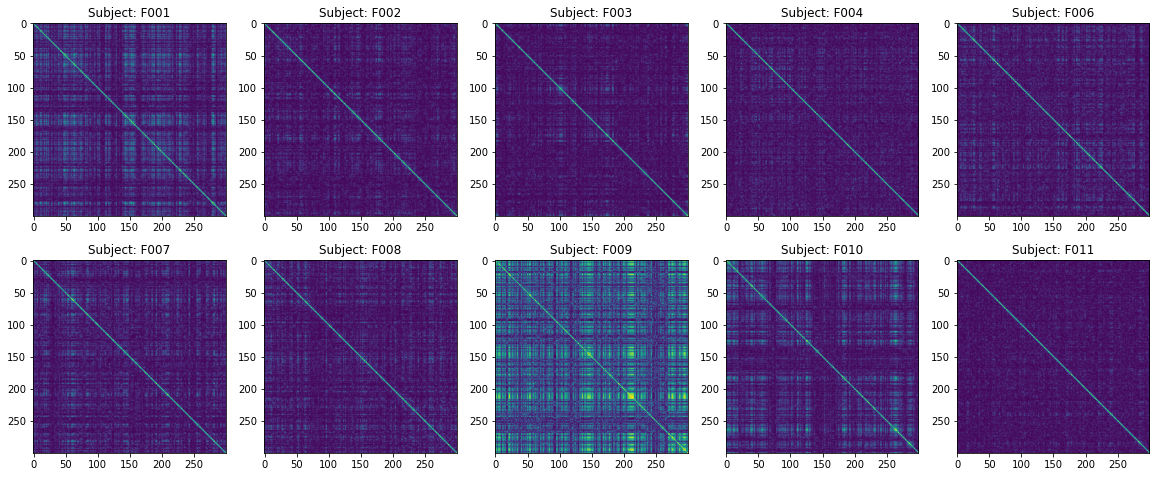

In [32]:
fig, axes = plt.subplots(2,5,figsize=(20,8))
for Sub, ax in zip(fep_subs, axes.flat): 
    ccd = np.load(f'data/Sub-{Sub}_Freq-Alpha_CCD.npy')
    im = ax.imshow(ccd, vmin=0, vmax=1)
    ax.set_title(f'Subject: {Sub}')   

Subject F009 is excluded because the mean of the CCD is too high

### Plot Control Group - Min 0, Max 1

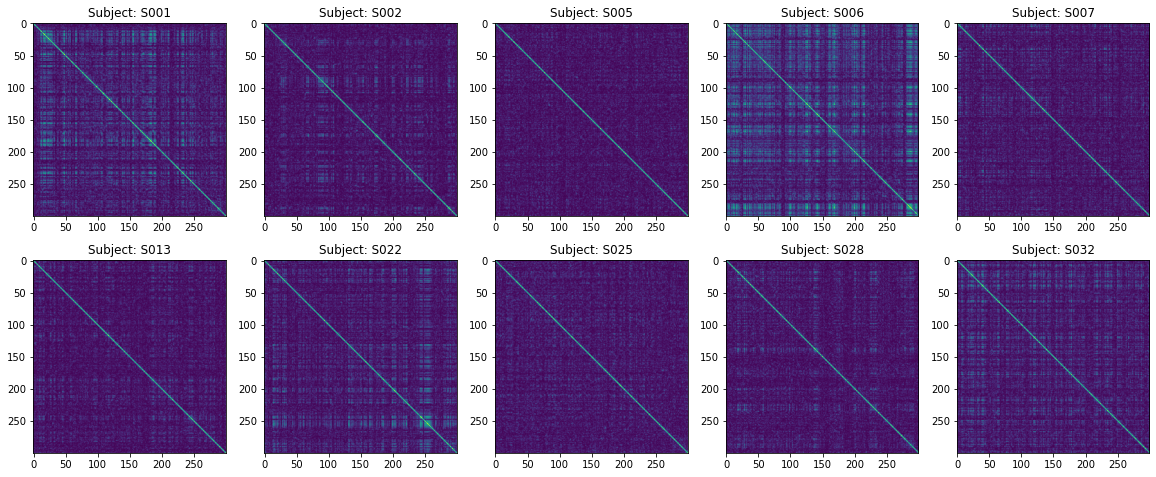

In [33]:
fig, axes = plt.subplots(2,5,figsize=(20,8))
for Sub, ax in zip(control_subs, axes.flat): 
    ccd = np.load(f'data/Sub-{Sub}_Freq-Alpha_CCD.npy')
    im = ax.imshow(ccd, vmin=0, vmax=1)
    ax.set_title(f'Subject: {Sub}')   

In [28]:
def get_hist_distr(data):
    """
    Calculates the histogram distribution of data. 
    This function is used for KSD computation.
    :params data, symmetric matrix as nd.array
    :returns array with histogram values
    """
    # Get histogramm 
    hist_idx = np.triu_indices(data.shape[0], k=1)
    hist, bin_edges = np.histogram(data[hist_idx], bins=np.arange(0,1,0.001))
    # midpoint of bin_edges 
    bins = bin_edges[:-1] + np.diff(bin_edges)/2
    hist_distr = np.repeat(bins, hist.astype('int'))
    return hist_distr

## FEP Histograms

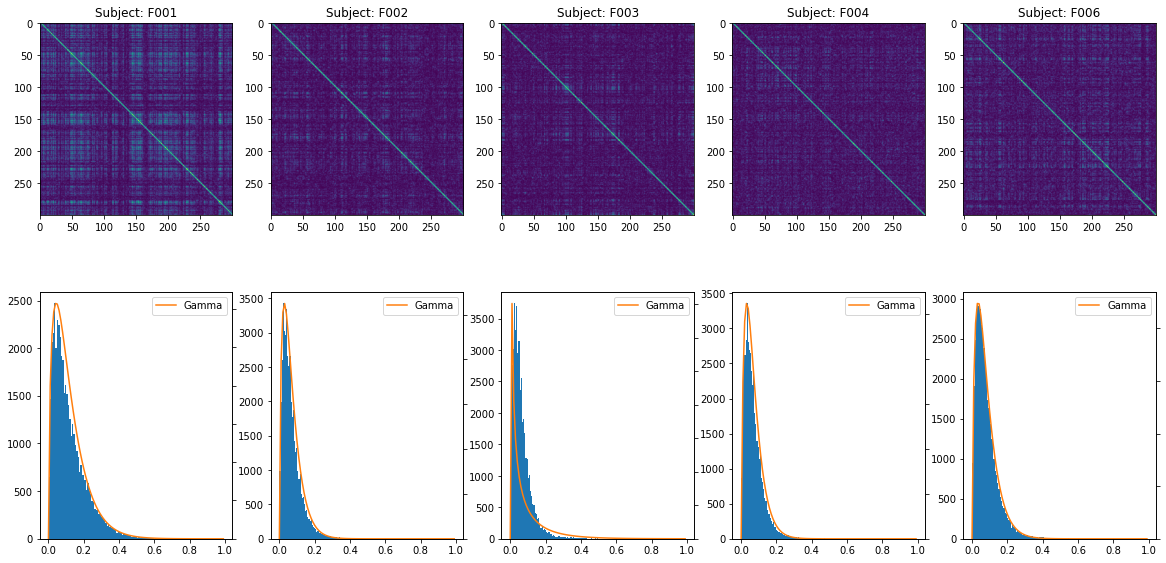

In [70]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
for n,Sub in enumerate(fep_subs[:5]): 
    ccd = np.load(f'data/Sub-{Sub}_Freq-Alpha_CCD.npy')
    im = ax[0,n].imshow(ccd, vmin=0, vmax=1)
    ax[0,n].set_title(f'Subject: {Sub}')   
    # Calc hist
    hist_distr = get_hist_distr(ccd)
    ax[1,n].hist(hist_distr, bins=100)
    # Fit Gamma
    alpha, loc, scale=scipy.stats.gamma.fit(hist_distr)
    x = np.arange(0,1,0.01)
    gamma = scipy.stats.gamma.pdf(x, alpha, loc, scale)    
    gamma_ax = ax[1,n].twinx(); gamma_ax.plot(x, gamma, color='tab:orange', label='Gamma')
    gamma_ax.set_ylim(bottom=0); gamma_ax.set_yticklabels([])
    gamma_ax.legend()

## Control Histograms

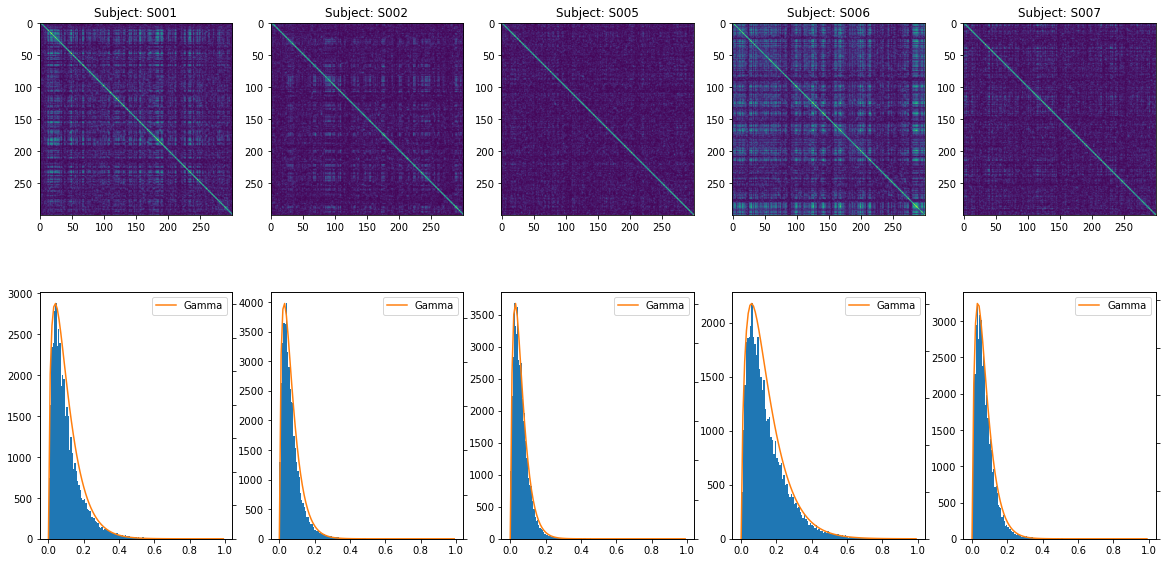

In [71]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
for n,Sub in enumerate(control_subs[:5]): 
    ccd = np.load(f'data/Sub-{Sub}_Freq-Alpha_CCD.npy')
    im = ax[0,n].imshow(ccd, vmin=0, vmax=1)
    ax[0,n].set_title(f'Subject: {Sub}')   
    # Calc hist
    hist_distr = get_hist_distr(ccd)
    ax[1,n].hist(hist_distr, bins=100)
    # Fit Gamma
    alpha, loc, scale=scipy.stats.gamma.fit(hist_distr)
    x = np.arange(0,1,0.01)
    gamma = scipy.stats.gamma.pdf(x, alpha, loc, scale)    
    gamma_ax = ax[1,n].twinx(); gamma_ax.plot(x, gamma, color='tab:orange', label='Gamma')
    gamma_ax.set_ylim(bottom=0); gamma_ax.set_yticklabels([])
    gamma_ax.legend()